# Unit 5 - Financial Planning

In [79]:
# Initial imports
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [80]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [81]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [82]:
# Crypto API URLs
# Why are we using Canadian Dollars instead of USD?

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_USD_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_USD_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [83]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["CAD"]["price"]

# USD Conversion
btc_response = requests.get(btc_USD_url).json()
btc_USD_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]

# USD Conversion
eth_response = requests.get(eth_USD_url).json()
eth_USD_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_btc_USD_value = my_btc * btc_USD_price
my_eth_USD_value = my_eth * eth_USD_price

# Print current crypto wallet balance
print(f"\nCANADIAN DOLLAR")
print(f"The current Canadian Dollar value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current Canadian Dollar value of your {my_eth} ETH is ${my_eth_value:0.2f}\n")

print(f"US DOLLAR")
print(f"The current US Dollar value of your {my_btc} BTC is ${my_btc_USD_value:0.2f}")
print(f"The current US Dallar value of your {my_eth} ETH is ${my_eth_USD_value:0.2f}")


CANADIAN DOLLAR
The current Canadian Dollar value of your 1.2 BTC is $61853.78
The current Canadian Dollar value of your 5.3 ETH is $20319.54

US DOLLAR
The current US Dollar value of your 1.2 BTC is $48915.60
The current US Dallar value of your 5.3 ETH is $16069.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [84]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [40]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key, 
   api_version = "v2"
)

In [85]:
# Format current date as ISO format
# YOUR CODE HERE!
# format yyyymmdd
#
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_investments = api.get_barset(
    tickers,
    timeframe,
    start = today,
    limit=1000
).df

# Preview DataFrame
df_investments.head()
df_investments

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   
...                           ...       ...       ...      ...       ...   
2022-01-03 00:00:00-05:00  113.67  113.6753  113.3100  113.310   8906643   
2022-01-04 00:00:00-05:00  113.22  113.3000  113.0750  113.290   7615698   
2022-01-05 00:00:00-05:00  113.34  113.3600  112.9000  112.930   7686662   
2022-01-06 00:00:00-05:00  112.75  112.8400  112.6600  112.810   6812819   
2022-01-07 00:00:00-05:00  112.69  112.7050  112.3400  112.500   8338975   

                              SPY                                         
                             open      high       low   close     volume  
time                                                                      
2020-05-01 00:00:00-04:00  285.31  290.6572  281.5200  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.1300  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.7500  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.7800  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.1300  287.70   68883538  
...                           ...       ...       ...     ...        ...  
2022-01-03 00:00:00-05:00  476.32  477.8500  473.8500  477.76   56128214  
2022-01-04 00:00:00-05:00  479.22  479.9800  475.5800  477.51   59093344  
2022-01-05 00:00:00-05:00  477.16  477.9800  468.2801  468.38   87411658  
2022-01-06 00:00:00-05:00  467.89  470.8200  465.4300  467.93   78577470  
2022-01-07 00:00:00-05:00  467.95  469.2000  464.6500  466.12   67943055  

[427 rows x 10 columns]

In [91]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_investments["AGG"]["close"][0])
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"\nCurrent iShares Core U.S. Aggregate Bond ETF(AGG) closing price: ${agg_close_price:0.2f}\n")
print(f"Current SPDR S&P 500 ETF Trust(SPY) closing price: ${spy_close_price:0.2f}")


Current iShares Core U.S. Aggregate Bond ETF(AGG) closing price: $116.90

Current SPDR S&P 500 ETF Trust(SPY) closing price: $282.73


In [94]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"\nThe current value of your {my_spy}, SPDR S&P 500 ETF Trust(SPY) shares is: ${my_spy_value:0.2f}\n")
print(f"The current value of your {my_agg}, iShares Core U.S. Aggregate Bond ETF (AGG) shares is: ${my_agg_value:0.2f}")


The current value of your 50, SPDR S&P 500 ETF Trust(SPY) shares is: $14136.50

The current value of your 200, iShares Core U.S. Aggregate Bond ETF (AGG) shares is: $23380.00


### Savings Health Analysis

In [60]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
my_savings = [
    my_btc_USD_value + my_eth_USD_value,
    my_spy_value + my_agg_value,
]
    
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(my_savings, columns=["Amount"], index=["Cypto","Share"])

# Display savings DataFrame
display(df_savings)

,Amount
Cypto,65592.185
Share,37516.500


<AxesSubplot:title={'center':'Ratio of Personal Savings'}, ylabel='Amount'>

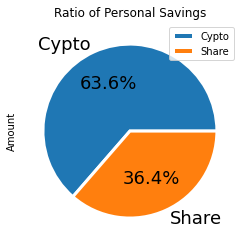

In [95]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="Amount", autopct='%.1f%%', 
                    wedgeprops={'linewidth':3.0, 'edgecolor':'white'},
                    textprops={'size': 'x-large'},
                    title="Ratio of Personal Savings", fontsize=18 )


#df_plot.setp(autotexts, size = 8, weight="bold", ax.set_title("Customizing Pie Chart))

In [78]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

deficiet = emergency_fund - total_savings

# Validate saving health
# YOUR CODE HERE!
if  emergency_fund < total_savings :
    print("\nWonderful, your piggy bank looks healthy! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("\nOkay, You are on the margin; keep saving to go over the hump.")
else:
    print(f"\nYou are ${deficiet:0.2f} away from your emergency fund goal, continue saving between 10% and 20% of your monthly income to reach your goal.")


Wonderful, your piggy bank looks healthy! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [108]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [110]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [111]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [112]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [113]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abacus Muntu\Desktop\HOMEWRK-2022\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004734,1.014035,1.001518,0.997960,0.989783,1.002047,1.006782,0.996895,1.010482,1.003030,...,0.985421,0.990520,1.001593,0.997183,0.989949,0.999357,0.995452,1.005434,1.002087,0.993224
2,1.006840,1.009652,1.006200,0.973164,0.985282,1.011115,1.005138,1.002253,1.009125,0.998670,...,0.992843,0.982703,0.996290,0.996373,0.987298,1.002261,0.989041,1.011679,0.994623,0.979768
3,1.005744,1.010522,1.014111,0.967059,0.991671,0.998678,0.992563,0.998333,1.015493,0.990311,...,0.993801,0.985662,1.000520,1.003581,0.994701,1.011533,0.982135,0.999120,1.002824,0.974892
4,1.007276,1.011654,1.010900,0.972670,0.998790,1.007144,0.999061,1.007979,1.008275,0.996474,...,1.000792,0.984282,0.992084,1.006801,0.990657,1.010352,0.986228,1.006501,1.001154,0.964933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,49.894820,17.591219,12.392910,23.613158,13.941181,22.673301,19.775261,15.212421,21.630344,20.626843,...,26.996147,47.902601,45.124094,46.650177,23.299989,15.668812,7.116719,41.310641,11.468166,44.729761
7557,50.112552,17.531626,12.347503,23.477607,13.905979,22.364875,19.717068,15.006333,21.511332,20.531915,...,27.416334,47.778996,45.705902,46.302169,23.037084,15.595657,7.161676,41.139013,11.546991,44.990140
7558,50.169601,17.537758,12.250787,23.429250,14.026335,22.311824,20.009825,14.924191,21.459021,20.713016,...,27.556090,48.234111,45.424659,46.227027,22.922337,15.486901,7.163315,40.656402,11.454947,45.158825
7559,50.469171,17.669473,12.525335,23.311251,13.980921,22.043861,20.250147,14.871649,21.433888,21.099569,...,27.606219,48.652436,45.293705,46.618325,22.955157,15.636726,7.214402,40.400822,11.561142,45.661118


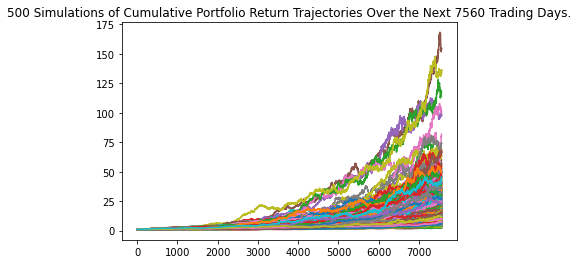

In [128]:
# Plot simulation outcomes
# YOUR CODE HERE! plot_simulation()
line_plot = MC_30.plot_simulation()

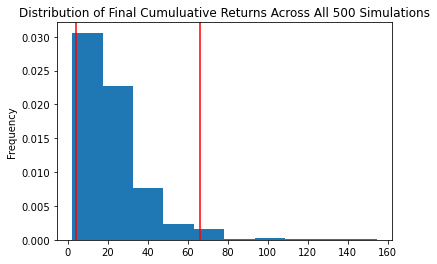

In [129]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE! .plot_distribution()

dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [131]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE! summarize_cumulative_return()
stat = MC_30.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stat)

count           500.000000
mean             22.736118
std              17.272587
min               2.184171
25%              12.102245
50%              18.487639
75%              27.825524
max             154.497536
95% CI Lower      4.044736
95% CI Upper     66.239556
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [134]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:0.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 30 years will end within in the range of $80894.72 and $1324791.12


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [137]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:0.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $30000.00 in the portfolio over the next 30 years will end within in the range of $121342.08 and $1987186.68


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [140]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [141]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abacus Muntu\Desktop\HOMEWRK-2022\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000462,1.000094,1.002783,0.995691,1.001124,1.012158,0.997222,0.997239,1.001051,1.000749,...,1.003948,0.993129,1.001676,1.005587,1.003542,0.999812,1.002401,1.002913,1.003396,0.997870
2,1.000150,1.001347,0.998944,0.992082,1.003646,1.008368,0.993146,0.994899,1.001605,0.994663,...,1.007540,0.998848,1.002951,1.007080,1.006064,1.004176,0.993818,1.002757,0.999035,0.996377
3,0.998043,1.000338,0.996166,0.992583,0.997822,1.007044,0.988020,0.996052,1.004708,0.994179,...,1.006793,0.991357,0.999107,1.006078,1.005748,1.004859,0.995624,1.007759,1.003661,0.993894
4,1.001006,0.990054,1.000789,0.993131,1.006447,1.004759,0.989478,0.997695,1.008548,0.997739,...,1.009928,0.994767,0.995444,0.997863,1.004900,1.002620,0.992129,1.016364,1.008049,1.004311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.069396,1.075232,1.187765,1.122437,1.178665,1.091955,1.121871,1.402013,1.059651,1.293674,...,1.434227,1.403361,1.053383,1.293336,1.706737,1.280452,1.277796,1.160576,1.123753,1.285391
1257,1.065582,1.078437,1.187085,1.117832,1.167880,1.091904,1.112839,1.402926,1.060862,1.287473,...,1.432415,1.403798,1.056886,1.296318,1.701201,1.277680,1.280997,1.164241,1.122520,1.286368
1258,1.065476,1.082252,1.193495,1.112153,1.175518,1.093574,1.112859,1.403787,1.057902,1.284362,...,1.442069,1.403272,1.062886,1.302335,1.703025,1.272556,1.279183,1.160782,1.118791,1.285838
1259,1.069304,1.081870,1.192827,1.111948,1.172175,1.094361,1.110557,1.403518,1.052980,1.286927,...,1.443883,1.398255,1.058165,1.299740,1.689710,1.272443,1.281695,1.162606,1.119107,1.276770


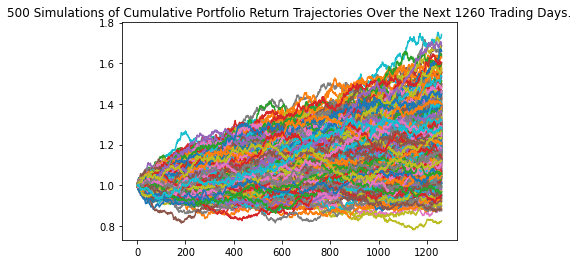

In [142]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_five = MC_5.plot_simulation()

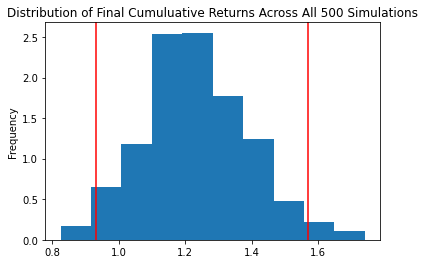

In [143]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_5.plot_distribution()

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE! summarize_cumulative_return()
stat = MC_5.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stat)

count           500.000000
mean              1.232842
std               0.159757
min               0.824308
25%               1.127541
50%               1.231025
75%               1.325661
max               1.741175
95% CI Lower      0.932450
95% CI Upper      1.571206
Name: 1260, dtype: float64


In [145]:
# Set initial investment
# YOUR CODE HERE!
init_invest = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(tbl[8] * init_invest,2)
ci_upper_five = round(tbl[9] * init_invest,2)

# Print results
print(f"\nThere is a 95% chance that an initial investment of ${init_invest:0.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")


There is a 95% chance that an initial investment of $20000.00 in the portfolio over the next 5 years will end within in the range of $80894.72 and $1324791.12


### Ten Years Retirement Option

In [149]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [151]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Abacus Muntu\Desktop\HOMEWRK-2022\RUT-VIRT-FIN-PT-11-2021-U-C\Homework\05-APIsHW\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998591,1.005586,1.000521,0.994331,1.010622,0.999263,1.002579,1.000531,0.998704,1.009332,...,0.996394,1.003354,0.997078,1.005284,1.005173,1.002266,1.003893,0.995180,0.994385,1.001570
2,1.002647,1.007533,0.996982,0.989890,1.011675,0.997323,1.001607,0.995347,0.992230,1.008473,...,0.996374,1.000360,0.995417,1.000835,1.009263,0.998529,0.998376,0.990835,0.997056,1.000603
3,1.005841,1.010547,0.998684,0.994278,1.007903,0.997588,1.004428,0.993586,0.990253,1.010575,...,0.998987,0.997616,0.998495,1.000982,1.011513,0.994287,1.000542,0.992362,0.998609,0.997170
4,1.008172,1.005095,0.997633,0.991097,1.006895,0.996085,1.006592,0.996494,0.988689,1.010506,...,1.001347,0.997184,0.995786,0.995182,1.006865,0.990802,0.998543,0.995852,0.998813,0.999537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.202231,1.385373,1.569134,1.371445,1.355136,1.546833,1.805172,1.419899,1.507724,1.533579,...,2.106892,1.293678,1.851458,1.613406,1.457005,1.305518,1.956078,1.655098,1.994154,1.910070
2517,1.207765,1.388476,1.565170,1.363241,1.363269,1.544915,1.803686,1.415390,1.511191,1.541671,...,2.112595,1.299039,1.860163,1.613995,1.464267,1.304946,1.952787,1.663087,1.988031,1.928686
2518,1.212232,1.387211,1.576764,1.358953,1.354956,1.547348,1.795135,1.422374,1.511924,1.542940,...,2.112854,1.303130,1.854516,1.619087,1.471176,1.296722,1.946472,1.662700,1.981549,1.918564
2519,1.210356,1.389282,1.578209,1.350462,1.361400,1.542756,1.792432,1.426502,1.514471,1.551560,...,2.108716,1.298662,1.853965,1.615807,1.464285,1.302892,1.951068,1.662542,1.994041,1.909446


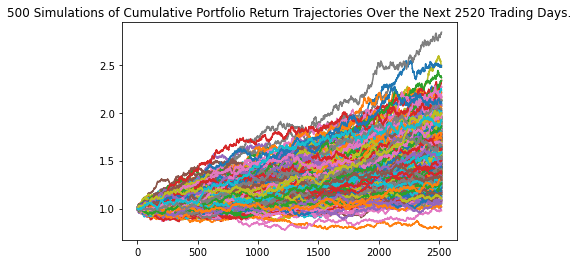

In [152]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = MC_10.plot_simulation()

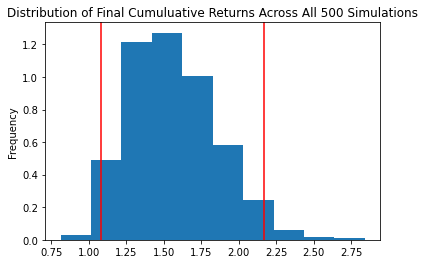

In [153]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = MC_10.plot_distribution()

In [154]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stat_10 = MC_10.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(stat_10)

count           500.000000
mean              1.564211
std               0.293726
min               0.811486
25%               1.355251
50%               1.540005
75%               1.755322
max               2.840549
95% CI Lower      1.080587
95% CI Upper      2.166725
Name: 2520, dtype: float64


In [159]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(stat_10[8] * initial_investment,2)
ci_upper_ten = round(stat_10[9] * initial_investment,2)


# Print results
print(f"\nThere is a 95% chance that an initial investment of ${initial_investment:.02f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")


There is a 95% chance that an initial investment of $60000.00 in the portfolio over the next 10 years will end within in the range of $64835.22 and $130003.51
